In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv('C:/Users/lenovo/foolad.csv')
data=data.set_index(pd.DatetimeIndex(data['Date'].values))
data=data.tail(80)

In [3]:
data0 = data.copy()
data0['date_id'] = ((data0.index.date - data0.index.date.min())).astype('timedelta64[D]')
data0['date_id'] = data0['date_id'].dt.days + 1
data0

,<TICKER>,Date,<FIRST>,<HIGH>,<LOW>,Close,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,date_id
2020-06-21,S*Mobarakeh.Steel,6/21/2020,12870,12870,12500,12860,4.030360e+12,313371052,37924,D,12260,12870,1
2020-06-22,S*Mobarakeh.Steel,6/22/2020,13500,13500,13100,13490,3.061100e+12,226987185,24775,D,12860,13500,2
2020-06-23,S*Mobarakeh.Steel,6/23/2020,14160,14160,14160,14160,2.037600e+11,14389854,976,D,13490,14160,3
2020-06-27,S*Mobarakeh.Steel,6/27/2020,14860,14860,14860,14860,1.702940e+12,114599090,9502,D,14160,14860,7
2020-06-28,S*Mobarakeh.Steel,6/28/2020,15600,15600,14300,15390,1.138630e+13,740019948,101074,D,14860,15120,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,S*Mobarakeh.Steel,10/18/2020,16700,16940,16180,16290,1.256370e+12,77129959,21448,D,17030,16180,120
2020-10-19,S*Mobarakeh.Steel,10/19/2020,15480,15480,15480,15480,1.865320e+12,120498847,14565,D,16290,15480,121
2020-10-20,S*Mobarakeh.Steel,10/20/2020,14710,14710,14710,14710,6.186440e+11,42056002,6464,D,15480,14710,122
2020-10-21,S*Mobarakeh.Steel,10/21/2020,14500,15250,13980,14330,5.150400e+12,359350446,69251,D,14710,14360,123


In [5]:
data1 = data0.copy()

while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['<HIGH>'],
                    )
    data1 = data1.loc[data1['<HIGH>'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['<HIGH>'],
                    )

data0['high_trend'] = reg[0] * data0['date_id'] + reg[1]

In [6]:
data0

,<TICKER>,Date,<FIRST>,<HIGH>,<LOW>,Close,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,date_id,high_trend
2020-06-21,S*Mobarakeh.Steel,6/21/2020,12870,12870,12500,12860,4.030360e+12,313371052,37924,D,12260,12870,1,26527.627119
2020-06-22,S*Mobarakeh.Steel,6/22/2020,13500,13500,13100,13490,3.061100e+12,226987185,24775,D,12860,13500,2,26472.542373
2020-06-23,S*Mobarakeh.Steel,6/23/2020,14160,14160,14160,14160,2.037600e+11,14389854,976,D,13490,14160,3,26417.457627
2020-06-27,S*Mobarakeh.Steel,6/27/2020,14860,14860,14860,14860,1.702940e+12,114599090,9502,D,14160,14860,7,26197.118644
2020-06-28,S*Mobarakeh.Steel,6/28/2020,15600,15600,14300,15390,1.138630e+13,740019948,101074,D,14860,15120,8,26142.033898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,S*Mobarakeh.Steel,10/18/2020,16700,16940,16180,16290,1.256370e+12,77129959,21448,D,17030,16180,120,19972.542373
2020-10-19,S*Mobarakeh.Steel,10/19/2020,15480,15480,15480,15480,1.865320e+12,120498847,14565,D,16290,15480,121,19917.457627
2020-10-20,S*Mobarakeh.Steel,10/20/2020,14710,14710,14710,14710,6.186440e+11,42056002,6464,D,15480,14710,122,19862.372881
2020-10-21,S*Mobarakeh.Steel,10/21/2020,14500,15250,13980,14330,5.150400e+12,359350446,69251,D,14710,14360,123,19807.288136


In [8]:
data1 = data0.copy()

while len(data1)>3:

    reg = linregress(
                    x=data1['date_id'],
                    y=data1['<LOW>'],
                    )
    data1 = data1.loc[data1['<LOW>'] < reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['<LOW>'],
                    )

data0['low_trend'] = reg[0] * data0['date_id'] + reg[1]

<AxesSubplot:>

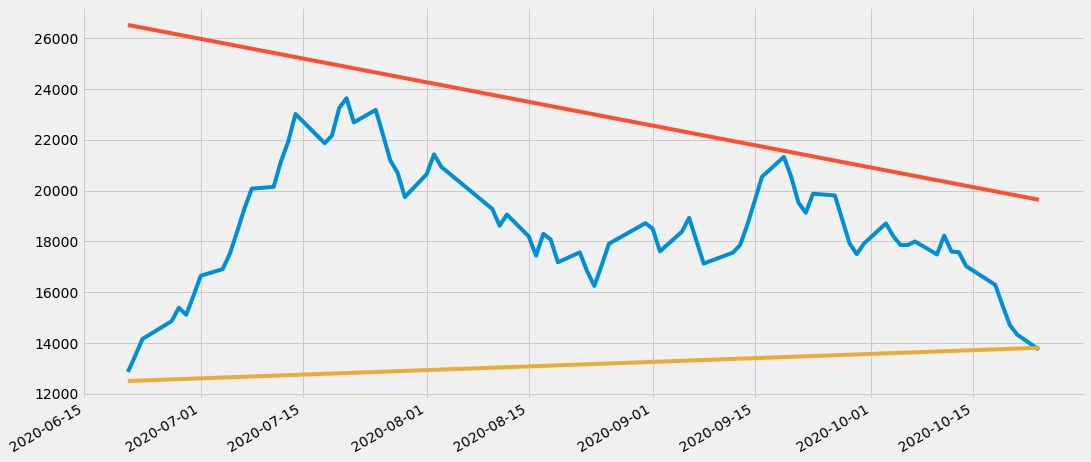

In [9]:
plt.figure(figsize=(16,8))
data0['Close'].plot()
data0['high_trend'].plot()
data0['low_trend'].plot()